Some notes on looking at the data:
1. Most entries aren't fully filled out
2. There is more Male data than Female data
3. More of the Female data isn't filled out than Male data
4. There is a definite difference in protein levels when looking at Males vs Females
5. It is more difficult to discern a difference between Sick vs Control
6. However after splitting the Male (and Female) dataset into Sick vs Control, there are some    differences when looking at proteins... in particular V12
7. These differences are more prominent in the Female dataset than the Male one... this may be    because of the smaller data set
8. There definitley seems to be some signal in classifying patients as sick vs control after
   splitting by gender... as evidenced by classifier preformances
9. There are definitely fat finger errors present in the data, I somewhat corrected for this      by filtering out all values below 1.
10. Please look at the usefulFunctions module I built out, there might be some interesting things in there to play around with... in particular the showBoxPlots, createBoxPlot, cleanAndFill, createBinaryDataSet 

Things I still need to look at:
1. Creating bands in terms of age
2. Creating bands in terms of days from diagnosis
3. Doing more corellation analysis
4. Trying out sampling techniques to create richer datasets

In [4]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from numpy.random import normal
import math
import usefulFunctions
from IPython.core.debugger import Tracer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# reading in the data
# think key - value storage
# key - patientId
# value - whole row (including patientID)
control = {}
sick = {}
male = {}
female = {}
age = []
months = []

table = pd.read_csv("Master_PL.xlsx - Master_PL.csv",header=0, 
                    names=["id", "type", "gender", "age", "monthsFromScreening", "protein_BL", "protein_V4",
                          "protein_V6", "protein_V8", "protein_V10", "protein_V12"])

totalRows = len(table.values)

# splitting data into female vs male, control vs sick, plus storing the age and months data
# into arrays so we can look at their distributions later (to understand good age bands)
for row in table.to_dict(orient='records'):
    if row['type'] is not None:
        if row['type'] == 1:
            control[int(row['id'])] = row
        else:
            sick[int(row['id'])] = row
    
    if row['gender'] is not None:
        if row['gender'] == 1:
            female[int(row['id'])] = row
        else:
            male[int(row['id'])] = row

    
    if row['age'] is not None:
        age.append(row['age'])
    
    if row['monthsFromScreening'] is not None:
        months.append(row['monthsFromScreening'])

print "Number of data points that are males : " + str(len(male))
print "Number of data points that are females : " + str(len(female))
print "Number of data points that are control : " + str(len(control))
print "Number of data points that are sick : " + str(len(sick))

Number of data points that are males : 403
Number of data points that are females : 216
Number of data points that are control : 196
Number of data points that are sick : 423


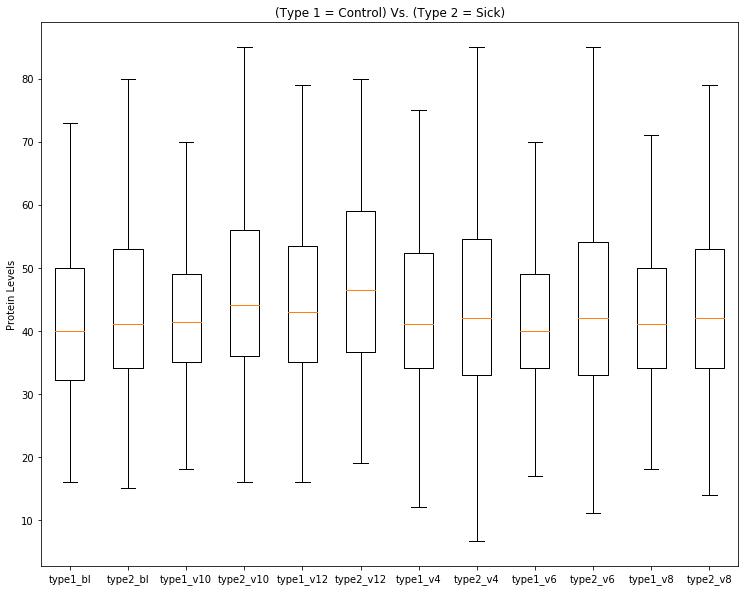

In [6]:
usefulFunctions.showBoxPlots(control, sick, "(Type 1 = Control) Vs. (Type 2 = Sick)")

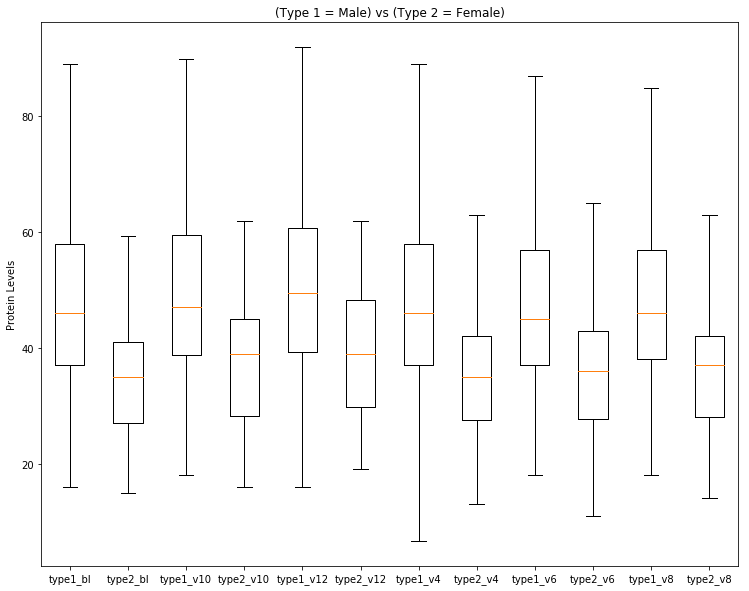

In [7]:
usefulFunctions.showBoxPlots(male, female, "(Type 1 = Male) vs (Type 2 = Female)")

In [8]:
tup = usefulFunctions.combine(male, female, control, sick)
maleSplit = tup[0]
femaleSplit = tup[1]
print "Number of Males that are in the Control : " + str(len(maleSplit[1]))
print "Number of Males that are Sick : " + str(len(maleSplit[2]))
print "Number of Females that are in the Control : " + str(len(femaleSplit[1]))
print "Number of Females that are Sick : " + str(len(femaleSplit[2]))

Number of Males that are in the Control : 126
Number of Males that are Sick : 277
Number of Females that are in the Control : 70
Number of Females that are Sick : 146


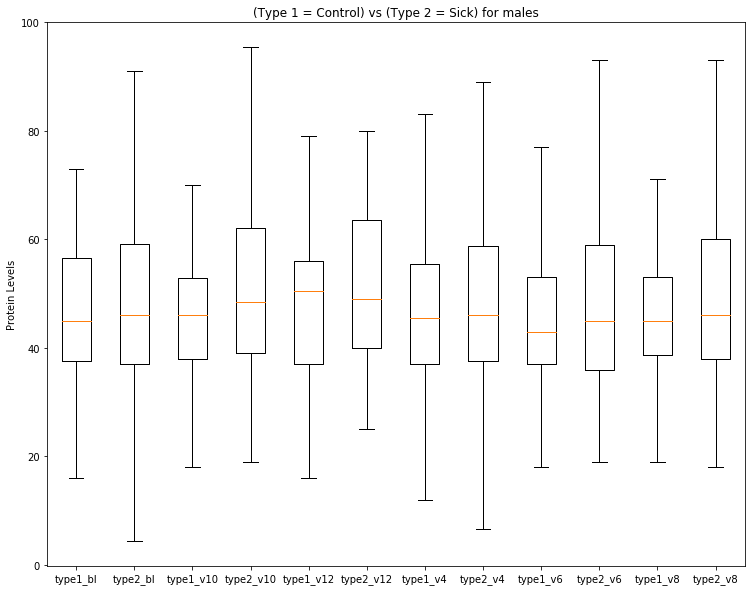

In [9]:
usefulFunctions.showBoxPlots(maleSplit[1], maleSplit[2], "(Type 1 = Control) vs (Type 2 = Sick) for males")

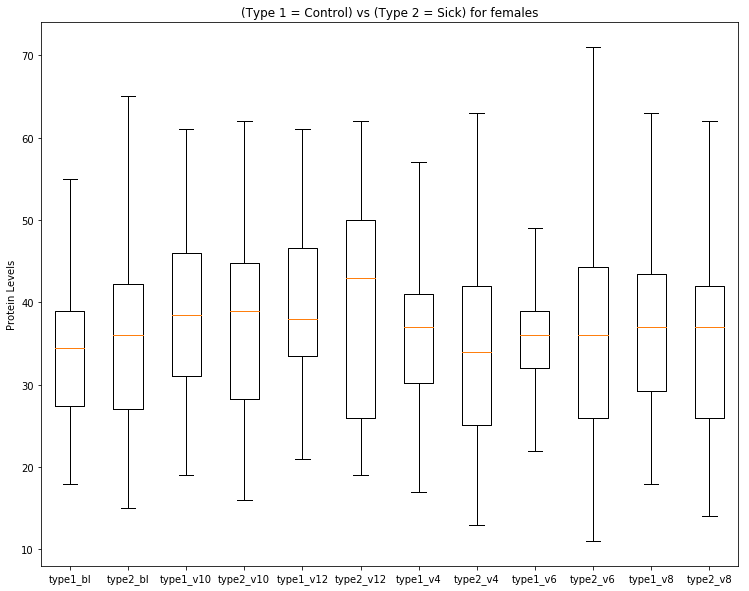

In [10]:
usefulFunctions.showBoxPlots(femaleSplit[1], femaleSplit[2], "(Type 1 = Control) vs (Type 2 = Sick) for females")

In [24]:
clf = RandomForestClassifier(n_estimators=30, random_state=1)
scores=[]
for i in range(10):
    data = usefulFunctions.createBinaryDataSet(maleSplit[1], maleSplit[2], fill=True, k=2)
    X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.3, random_state=i)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

print scores
print "Mean: " + str(usefulFunctions.computeMean(scores))

[0.84482758620689657, 0.84482758620689657, 0.7068965517241379, 0.84482758620689657, 0.81034482758620685, 0.82758620689655171, 0.82758620689655171, 0.91379310344827591, 0.81034482758620685, 0.84482758620689657]
Mean: 0.827586206897


In [25]:
clf = AdaBoostClassifier(n_estimators=100)
scores=[]
for i in range(10):
    data = usefulFunctions.createBinaryDataSet(maleSplit[1], maleSplit[2], fill=True, k=2)
    X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.3, random_state=i)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

print scores
print "Mean: " + str(usefulFunctions.computeMean(scores))

[0.82758620689655171, 0.7068965517241379, 0.7068965517241379, 0.86206896551724133, 0.7068965517241379, 0.75862068965517238, 0.84482758620689657, 0.86206896551724133, 0.7931034482758621, 0.84482758620689657]
Mean: 0.791379310345


In [20]:
clf = RandomForestClassifier(n_estimators=30, random_state=1)
scores=[]
for i in range(10):
    data = usefulFunctions.createBinaryDataSet(femaleSplit[1], femaleSplit[2], fill=True, k=2)
    X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.3, random_state=i)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

print scores
print "Mean: " + str(usefulFunctions.computeMean(scores))

[0.5714285714285714, 0.5714285714285714, 0.8571428571428571, 0.5, 0.5714285714285714, 0.7142857142857143, 0.5, 0.7857142857142857, 0.5714285714285714, 0.5714285714285714]
Mean: 0.621428571429


In [22]:
clf = AdaBoostClassifier(n_estimators=100)
scores=[]
for i in range(10):
    data = usefulFunctions.createBinaryDataSet(femaleSplit[1], femaleSplit[2], fill=True, k=2)
    X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.3, random_state=i)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

print scores
print "Mean: " + str(usefulFunctions.computeMean(scores))

[0.42857142857142855, 0.7142857142857143, 0.7142857142857143, 0.5714285714285714, 0.6428571428571429, 0.5714285714285714, 0.5714285714285714, 0.7857142857142857, 0.6428571428571429, 0.6428571428571429]
Mean: 0.628571428571
